1.1 Encontrar, usando el método de AGs, la raíz real del polinomio P(x) = 5x5- 3x4-x3-5x2-x-3 en el intervalo [0.5 1], 
usando números reales, una población de 100 listas, un solo tipo de cruce y selección por clasificación. 
Dibuje un cuadro de aptitud contra generación.

## Propósito del Código

El propósito de este código es utilizar un algoritmo genético para encontrar una raíz aproximada de un polinomio dado. En términos más simples, busca un valor de \(x\) para el cual el polinomio \(P(x)\) es aproximadamente igual a cero.

### Pasos del Algoritmo

1. **Definición del Polinomio**:
    - Se define un polinomio de quinto grado llamado \(P(x)\).

2. **Parámetros del Algoritmo Genético**:
    - Se establecen los parámetros del algoritmo genético, como el tamaño de la población, el número de generaciones y la tasa de mutación.

3. **Función de Aptitud**:
    - Se define una función de aptitud que mide qué tan cerca está un candidato de ser una solución. En este caso, se usa la función de aptitud para evaluar qué tan cercano está el polinomio a cero para un valor de \(x\) específico.

4. **Inicialización de la Población**:
    - Se crea una población inicial de candidatos con valores de \(x\) aleatorios en un rango específico.

5. **Ciclo Principal del Algoritmo Genético**:
    - A lo largo de un número determinado de generaciones, se realizan los siguientes pasos:
        - Se evalúa la aptitud de cada individuo en la población.
        - Se calculan las probabilidades de selección basadas en la aptitud.
        - Se seleccionan individuos para la reproducción según estas probabilidades.
        - Se generan nuevos individuos a través del cruce y, opcionalmente, se aplican mutaciones.
        - La población se actualiza con la nueva generación de individuos.

6. **Registro de la Mejor Aptitud y el Mejor Candidato**:
    - Se registra la mejor aptitud y el mejor candidato en cada generación.

7. **Encontrar la Raíz Aproximada**:
    - Se toma el mejor candidato de la última generación como la raíz aproximada.

8. **Graficar la Aptitud contra Generación**:
    - Se genera un gráfico que muestra cómo la aptitud evoluciona a lo largo de las generaciones.

9. **Imprimir Resultados Finales**:
    - Se imprime la raíz aproximada encontrada y el mejor candidato de la última generación.

En resumen, el código utiliza un algoritmo genético para encontrar una solución (en este caso, una raíz aproximada) a un problema específico (en este caso, encontrar un valor de \(x\) para el cual el polinomio \(P(x)\) es cercano a cero). Este es un ejemplo de cómo se pueden aplicar algoritmos genéticos en la optimización y búsqueda de soluciones en problemas complejos.


### Importación de Librerías

In [11]:
import math               # Libreria que se usa para realizar operaciones matemáticas y funciones
import random             # Libreria usada para generar números aleatorios
import numpy as np        # Libreria para trabajar con matrices y operaciones numéricas
import matplotlib.pyplot as plt  # Librería para graficar


## Explicación del Código

### 1. Definición del Polinomio `P(x)`

```python
def polynomial(x):
    return 5*x**5 - 3*x**4 - x**3 - 5*x**2 - x - 3

Esta función polynomial(x) define un polinomio de quinto grado.

In [12]:
def Polinomio(x):
    valor = 5 * x**5 - 3 * x**4 - x**3 - 5 * x**2 - x - 3
    return valor

### 2. Parámetros del Algoritmo Genético

In [13]:
# Parámetros del algoritmo genético
longCrom = 100  # Longitud de los cromosomas
TamañoPoblacion = 10  # Tamaño de la población
NumeroGeneraciones = 100  # Número de Generaciones
TasaMutacion = 0.05  # Tasa de mutación

Aquí se establecen los parámetros para el algoritmo genético:

population_size: Tamaño de la población de candidatos.
num_generations: Número de generaciones que se ejecutará el algoritmo.
mutation_rate: Tasa de mutación, que determina la probabilidad de que un individuo mute.

### 3. Función para evaluar la población

In [14]:
def EvaluarPoblacion(Pob_nueva):
    # Inicialización de variables
    Apt_total = 0
    vectorX = np.zeros(TamañoPoblacion, dtype=float)
    probab = np.zeros(TamañoPoblacion, dtype=float)
    Polinomio = np.zeros(TamañoPoblacion, dtype=float)
    mejor = 50.
    mejorX = 0.

    i = 0
    while(i < TamañoPoblacion):
        t, x = res_Funcion(Pob_nueva[i])
        vectorX[i] = x
        Polinomio[i] = (10 - abs(t)) * 100
        i += 1
    Apt_total = float(sum(Polinomio))
    probab = 10 * [j/Apt_total for j in Polinomio]
    maxprobab = np.amax(probab)
    maxIndex = np.argmax(probab)
    mejorx = vectorX[maxIndex]
    probab[maxIndex] = 0.99
    return probab, vectorX, max(Polinomio)

Esta función evalúa la aptitud de cada solución en la población utilizando la función P(x)P(x).
Devuelve probabilidades normalizadas, valores de xx y el mejor valor de la función P(x)P(x)

### 4. Función para generar una población inicial

In [15]:
def GenerarPoblacionInicial(TamañoPoblacion, longCrom):
    Pob_nueva = np.zeros([TamañoPoblacion, longCrom], dtype=int)
    cromosoma = np.zeros([longCrom-1], dtype=int)
    j = 0
    while j < TamañoPoblacion:
        cromosoma = [random.randint(0, 1) for i in range(longCrom)]
        Pob_nueva[j] = cromosoma
        j += 1
    return Pob_nueva

Esta función crea una población inicial de soluciones representadas como arreglos de bits.

### 5. Función para calcular el valor de la función y la variable xx a partir de un cromosoma 

In [16]:
def res_Funcion(cromosoma):
    x = decodificar(cromosoma)
    funcion = Polinomio(x)
    return funcion, x


### 6. Función para decodificar un cromosoma

In [17]:
def decodificar(cromosoma):
    xi = 0.5  # Límite inferior en el dominio real
    xf = 1.5  # Límite superior en el dominio real
    Max = 2 ** (longCrom)
    cromPot = [cromosoma[i]*2**(longCrom-i-1) for i in range(longCrom)]
    valorDecimal = sum(cromPot)
    cromPot = 0
    valDeco = ((xf-xi)/Max)*(valorDecimal)+xi
    return valDeco

Convierte un cromosoma binario en un valor en el dominio real.

### 7. Función de cruce

In [18]:
def cruce(Pob_nueva, Probabilidad):
    maxprobab = np.amax(prob_cromosoma)
    maxIndex = np.argmax(prob_cromosoma)
    len(Pob_nueva)
    i = 0
    while (i < TamañoPoblacion-1):
        mejorCrom = Pob_nueva[maxIndex]
        if Probabilidad[i] < 0.97:
            rand = random.randint(2, longCrom-1)  # Posición de cruce aleatoria
            padre1 = Pob_nueva[i]
            padre2 = Pob_nueva[i+1]
            j = rand
            while(j < longCrom):
                bit = padre1[j]
                padre1[j] = padre2[j]
                padre2[j] = bit
                j += 1
        else:
            if maxIndex % 2 == 0:
                Pob_nueva[i] = Pob_nueva[maxIndex]
            else:
                Pob_nueva[i+1] = Pob_nueva[maxIndex]
        i += 2
    return Pob_nueva

Realiza el cruce de dos cromosomas para generar nuevos individuos en la población

### 8. Función de mutación

In [19]:
def muta(Pob_nueva, TasaMutacion):
    totalbits = TamañoPoblacion * longCrom
    segmento = 1/TasaMutacion
    n_segmentos = totalbits/segmento
    i = 0
    while(i < n_segmentos-1):
        aleatorio = random.randint(0, segmento-1)
        posic = int(i * segmento + aleatorio)
        y = int((posic/longCrom))
        cromosoma = Pob_nueva[y]
        x = posic - longCrom * y
        if (cromosoma[x-1] == 0):
            cromosoma[x-1] = 1
        else:
            cromosoma[x-1] = 0
        i += 1
    return Pob_nueva


Introduce cambios aleatorios en los cromosomas de la población.

### 9. Selección Basada en el Método de Ruleta

In [20]:
def seleccion_ruleta(poblacion, probabilidad):
    chosen = []
    while len(chosen) <= TamañoPoblacion:
        for n in range(TamañoPoblacion):
            r = random.random()
            for (i, individuo) in enumerate(poblacion):
                if i > TamañoPoblacion:
                    break
                if r <= probabilidad[i]:
                    chosen.append(list(individuo))
                    break
    return chosen

### 10. Generación de la Nueva Población

In [21]:
# GenerarPoblacionInicialción de la población inicial
Pob_nueva3 = GenerarPoblacionInicial(TamañoPoblacion, longCrom)
prob_cromosoma, vectorX, AptI = EvaluarPoblacion(Pob_nueva3)
i = 0

Px = list()
Py = list()
PaptI = list()


Se crea una población inicial llamada Pob_nueva3 usando la función GenerarPoblacionInicial.

### 11. While principal para la ejecución del algoritmo genético

In [22]:
while (i < NumeroGeneraciones):
    Pob_vieja = Pob_nueva3
    Pob_nueva1 = seleccion_ruleta(Pob_vieja, prob_cromosoma)
    Pob_nueva2 = cruce(Pob_nueva1, prob_cromosoma)
    Pob_nueva3 = muta(Pob_nueva2, TasaMutacion)
    prob_cromosoma, vectorX, AptI = EvaluarPoblacion(Pob_nueva3)
    maxprobab = np.amax(prob_cromosoma)
    maxIndex = np.argmax(prob_cromosoma)
    mejorx = vectorX[maxIndex]
    x = mejorx
    val = Polinomio(x)
    Px.append(i)
    Py.append(val)
    PaptI.append(AptI)
    i += 1

Se ejecuta el algoritmo durante un número de generaciones determinado, actualizando la población en cada iteración mediante selección, cruce y mutación.

### 12. Graficar la Aptitud contra Generación

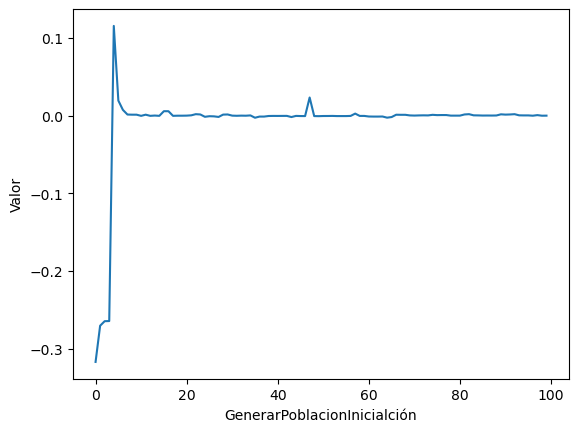

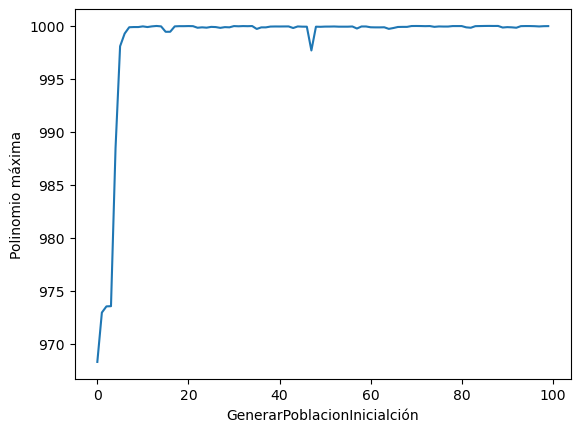

In [23]:
# Gráficos
plt.plot(Px, Py)
plt.xlabel('GenerarPoblacionInicialción')
plt.ylabel('Valor')
plt.show()

plt.plot(Px, PaptI)
plt.xlabel('GenerarPoblacionInicialción')
plt.ylabel('Polinomio máxima')
plt.show()


Se generan dos gráficos que muestran la evolución del valor de la función y el valor máximo de P(x)P(x) en función del número de generaciones.

### 13. Resultados Finales

In [24]:
# Encontrar el mejor individuo
best_individual = Pob_nueva3[maxIndex]
best_x = vectorX[maxIndex]
best_fitness = Polinomio(best_x)

# Mostrar el resultado
print("Mejor Solución x:", best_x, "con F(x) =", best_fitness)


Mejor Solución x: 1.4346372674366838 con F(x) = -0.00017992289715973442


Se identifica el mejor individuo y se calcula su valor de x y el resultado de P(x) y se imprime en la consola la mejor solución encontrada.